This notebook is dependent on a separate python script (usgs_querier) to pull parameters related to an earthquake. If you don't have this, you can manually copy the paramters from the USGS webpage.

#### Before starting, go to the event page for the earthquake of interest: https://earthquake.usgs.gov/earthquakes/eventpage/ci39812319/executive
* pull the event id (two letters followed by 8 numbers)
* pull the json file for the ShakeMap
    * Click 'ShakeMap'
    * scroll to 'Downloads'
    * select the json file under 'Intensity Contours'
    * at the bottom of the list, there is also a 'station list' file that might be of interest

Want another tool? There is a free workshop series on GeoPandas offerred by DLab coming up: https://dlab.berkeley.edu/events/geospatial-data-and-mapping-python-parts-1-3/2022-03-01

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
import pandas as pd
import json

import usgs_querier
from obspy import UTCDateTime

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
## enter the manual information:
evid = 'ci39812319'
mmi_path = 'Carson_cont_mmi.json'

## get and store USGS event parameters
client = usgs_querier.EQFromUSGS()
eq_info = client.from_evid(evid)
print (eq_info)
evla = float(eq_info['latitude'])
evlo = float(eq_info['longitude'])
evdp = float(eq_info['depth'])
mag = float(eq_info['mag'])

evtime = UTCDateTime(eq_info['time'][0][:23])
evtime_ts_sec = evtime.timestamp
print('USGS event ID: ',evid)
print("evtime_ts_sec: ",evtime_ts_sec)

                       time    latitude     longitude  depth   mag magType  \
0  2021-09-18T02:58:34.700Z  33.8313333  -118.2636667  11.86  4.28      mw   

   nst gap     dmin   rms  ...                   updated                place  \
0  181  60  0.03611  0.28  ...  2022-02-01T18:28:27.702Z  2km E of Carson, CA   

         type horizontalError depthError magError magNst    status  \
0  earthquake            0.17       0.25               6  reviewed   

  locationSource magSource  
0             ci        ci  

[1 rows x 22 columns]
USGS event ID:  ci39812319
evtime_ts_sec:  1631933914.7


In [3]:
## digest the json file

f = open(mmi_path,)
data = json.load(f)
data.keys()

### The json is nested dictionaries inside nested dictionaries ###
## data -> features -> properties -> value, color
## data -> features -> geometry -> coordinates
properties = [feature['properties'] for feature in data['features']]
geometry = [feature['geometry'] for feature in data['features']]

i = 0
for p in properties:
    print(i, p)
    i+= 1

0 {'value': 1.0, 'units': 'mmi', 'color': '#ffffff', 'weight': 2}
1 {'value': 1.5, 'units': 'mmi', 'color': '#dfe6ff', 'weight': 4}
2 {'value': 2.0, 'units': 'mmi', 'color': '#bfccff', 'weight': 2}
3 {'value': 2.5, 'units': 'mmi', 'color': '#afd9ff', 'weight': 4}
4 {'value': 3.0, 'units': 'mmi', 'color': '#a0e5ff', 'weight': 2}
5 {'value': 3.5, 'units': 'mmi', 'color': '#90f2ff', 'weight': 4}
6 {'value': 4.0, 'units': 'mmi', 'color': '#80ffff', 'weight': 2}
7 {'value': 4.5, 'units': 'mmi', 'color': '#7cffc7', 'weight': 4}
8 {'value': 5.0, 'units': 'mmi', 'color': '#7cff90', 'weight': 2}


In [4]:
## default MMI colors just in case you need them for plotting something other than the ShakeMap contours
mmi1_color =  '#ffffff'
mmi15_color = '#dfe6ff'
mmi2_color =  '#bfccff'
mmi25_color = '#afd9ff'
mmi3_color =  '#a0e5ff'
mmi35_color = '#90f3ff'
mmi4_color =  '#80ffff'
mmi45_color = '#7dffc9'
mmi5_color =  '#7aff93'
mmi55_color = '#bdff4a'
mmi6_color =  '#ffff00'
mmi65_color = '#ffe300'
mmi7_color =  '#ffc800'
mmi75_color = '#ffad00'
mmi8_color =  '#ff9100'

In [5]:
## default contours to off
plotmmi1 = False
plotmmi15 = False
plotmmi2 = False
plotmmi25 = False
plotmmi3 = False
plotmmi35 = False
plotmmi4 = False
plotmmi45 = False
plotmmi5 = False
plotmmi55 = False
plotmmi6 = False
plotmmi65 = False
plotmmi7 = False
plotmmi75 = False
plotmmi8 = False
plotmmi85 = False
plotmmi9 = False

## iterate through data and turn on variables if contour data is available
for ix in range(len(properties)):
    if properties[ix]['value'] == 1:
        mmi1_color = properties[ix]['color']
        mmi1_cont = geometry[ix]['coordinates']
        mmi1_weight = properties[ix]['weight']
        plotmmi1 = True
        print('yes MMI 1,   ix =', ix)
    if properties[ix]['value'] == 1.5:
        mmi15_color = properties[ix]['color']
        mmi15_cont = geometry[ix]['coordinates']
        mmi15_weight = properties[ix]['weight']
        plotmmi15 = True
        print('yes MMI 1.5, ix =', ix)
    if properties[ix]['value'] == 2:
        mmi2_color = properties[ix]['color']
        mmi2_cont = geometry[ix]['coordinates']
        mmi2_weight = properties[ix]['weight']
        plotmmi2 = True
        print('yes MMI 2,   ix =', ix)
    if properties[ix]['value'] == 2.5:
        mmi25_color = properties[ix]['color']
        mmi25_cont = geometry[ix]['coordinates']
        mmi25_weight = properties[ix]['weight']
        plotmmi25 = True
        print('yes MMI 2.5, ix =', ix)
    if properties[ix]['value'] == 3:
        mmi3_color = properties[ix]['color']
        mmi3_cont = geometry[ix]['coordinates']
        mmi3_weight = properties[ix]['weight']
        plotmmi3 = True
        print('yes MMI 3,   ix =', ix)
    if properties[ix]['value'] == 3.5:
        mmi35_color = properties[ix]['color']
        mmi35_cont = geometry[ix]['coordinates']
        mmi35_weight = properties[ix]['weight']
        plotmmi35 = True
        print('yes MMI 3.5, ix =', ix)
    if properties[ix]['value'] == 4:
        mmi4_color = properties[ix]['color']
        mmi4_cont = geometry[ix]['coordinates']
        mmi4_weight = properties[ix]['weight']
        plotmmi4 = True
        print('yes MMI 4,   ix =', ix)
    if properties[ix]['value'] == 4.5:
        mmi45_color = properties[ix]['color']
        mmi45_cont = geometry[ix]['coordinates']
        mmi45_weight = properties[ix]['weight']
        plotmmi45 = True
        print('yes MMI 4.5, ix =', ix)
    if properties[ix]['value'] == 5:
        mmi5_color = properties[ix]['color']
        mmi5_cont = geometry[ix]['coordinates']
        mmi5_weight = properties[ix]['weight']
        plotmmi5 = True
        print('yes MMI 5,   ix =', ix)
    if properties[ix]['value'] == 5.5:
        mmi55_color = properties[ix]['color']
        mmi55_cont = geometry[ix]['coordinates']
        mmi55_weight = properties[ix]['weight']
        plotmmi55 = True
        print('yes MMI 5.5, ix =', ix)
    if properties[ix]['value'] == 6:
        mmi6_color = properties[ix]['color']
        mmi6_cont = geometry[ix]['coordinates']
        mmi6_weight = properties[ix]['weight']
        plotmmi6 = True
        print('yes MMI 6,   ix =', ix)
    if properties[ix]['value'] == 6.5:
        mmi65_color = properties[ix]['color']
        mmi65_cont = geometry[ix]['coordinates']
        mmi65_weight = properties[ix]['weight']
        plotmmi65 = True
        print('yes MMI 6.5, ix =', ix)
    if properties[ix]['value'] == 7:
        mmi7_color = properties[ix]['color']
        mmi7_cont = geometry[ix]['coordinates']
        mmi7_weight = properties[ix]['weight']
        plotmmi7 = True
        print('yes MMI 7,   ix =', ix)
    if properties[ix]['value'] == 7.5:
        mmi75_color = properties[ix]['color']
        mmi75_cont = geometry[ix]['coordinates']
        mmi75_weight = properties[ix]['weight']
        plotmmi75 = True
        print('yes MMI 7.5, ix =', ix)
    if properties[ix]['value'] == 8:
        mmi8_color = properties[ix]['color']
        mmi8_cont = geometry[ix]['coordinates']
        mmi8_weight = properties[ix]['weight']
        plotmmi8 = True
        print('yes MMI 8,   ix =', ix)
    if properties[ix]['value'] == 8.5:
        mmi85_color = properties[ix]['color']
        mmi85_cont = geometry[ix]['coordinates']
        mmi85_weight = properties[ix]['weight']
        plotmmi85 = True
        print('yes MMI 8.5, ix =', ix)
    if properties[ix]['value'] == 9:
        mmi9_color = properties[ix]['color']
        mmi9_cont = geometry[ix]['coordinates']
        mmi9_weight = properties[ix]['weight']
        plotmmi9 = True
        print('yes MMI 9,   ix =', ix)

yes MMI 1,   ix = 0
yes MMI 1.5, ix = 1
yes MMI 2,   ix = 2
yes MMI 2.5, ix = 3
yes MMI 3,   ix = 4
yes MMI 3.5, ix = 5
yes MMI 4,   ix = 6
yes MMI 4.5, ix = 7
yes MMI 5,   ix = 8


### turn the next cell to code if you want to pull in a different version of contours, like the NEIC unreviewed data

In [6]:
## create nested lists of the MMI contours.
## It is not always a single list of coordinates because sometimes there are MMI 'islands' in addition to the main contour

if plotmmi15:
    lon15 = []
    lat15 = []
    for i in mmi15_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon15.append(lon)
        lat15.append(lat)

if plotmmi2:
    lon2 = []
    lat2 = []
    for i in mmi2_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon2.append(lon)
        lat2.append(lat)

if plotmmi25:
    lon25 = []
    lat25 = []
    for i in mmi25_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon25.append(lon)
        lat25.append(lat)
        
if plotmmi3:
    lon3 = []
    lat3 = []
    for i in mmi3_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon3.append(lon)
        lat3.append(lat)

if plotmmi35:
    lon35 = []
    lat35 = []
    for i in mmi35_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon35.append(lon)
        lat35.append(lat)
        
if plotmmi4:
    lon4 = []
    lat4 = []
    for i in mmi4_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon4.append(lon)
        lat4.append(lat)
        
if plotmmi45:
    lon45 = []
    lat45 = []
    for i in mmi45_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon45.append(lon)
        lat45.append(lat)
        
if plotmmi5:
    lon5 = []
    lat5 = []
    for i in mmi5_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon5.append(lon)
        lat5.append(lat)
        
if plotmmi55:
    lon55 = []
    lat55 = []
    for i in mmi55_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon55.append(lon)
        lat55.append(lat)
        
if plotmmi6:
    lon6 = []
    lat6 = []
    for i in mmi6_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon6.append(lon)
        lat6.append(lat)

if plotmmi65:
    lon65 = []
    lat65 = []
    for i in mmi65_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon65.append(lon)
        lat65.append(lat)
    
if plotmmi7:
    lon7 = []
    lat7 = []
    for i in mmi7_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon7.append(lon)
        lat7.append(lat)

if plotmmi75:
    lon75 = []
    lat75 = []
    for i in mmi75_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon75.append(lon)
        lat75.append(lat)

if plotmmi8:
    lon8 = []
    lat8 = []
    for i in mmi8_cont:
        lon = []
        lat = []
        for j in i:
            lon.append(j[0])
            lat.append(j[1])
        lon8.append(lon)
        lat8.append(lat)

### Sample data to show additional features for cartopy

In [7]:
## pull in contour file from April 2020 (most recent update)
contourfile = 'SA-20200401-BA08_worden_contourdist_av.csv'
clist = pd.read_csv(contourfile, skiprows=1, index_col=False, 
                    names = ["cmag", "cmmi", "notneeded1","notneeded2", "cdist-km"])

## ShakeAlert maximum estimate for the 09/18/21 Carson event
m_est = 4.9
lat_est = 33.8353
lon_est = -118.2776

row3 = clist.loc[(clist['cmag'] == m_est) & (clist['cmmi'] == 3),'cdist-km']
rad_est_mmi3 = row3.iloc[0] # MMI 3 alerting radius

## start setting up the map

In [14]:
import cartopy.io.img_tiles as cimgt
## set color (RGB array) of water to white and land to grey
# cft.COLORS = {'water': np.array([ 1, 1, 1 ]), 'land': np.array([ 0.90 , 0.90 , 0.90]), 'land_alt1': np.array([ 0.859375, 0.859375, 0.859375])}
cft.COLORS = {'water': np.array([ .96, .98, .98 ]), 'land': np.array([ 0.4 , 0.4 , 0.4]), 'land_alt1': np.array([ 0.859375, 0.859375, 0.859375])}

## call features from the Natural Earth Feature repository
## https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html

land = cft.NaturalEarthFeature('physical', 'land', '10m',   # for faster maps, change to 50m
                                        edgecolor='face',
                                        facecolor=cft.COLORS['land'])
oceans = cft.NaturalEarthFeature('physical', 'ocean', '10m',
                                        edgecolor='face',
                                        facecolor=cft.COLORS['water'])
lakes = cft.NaturalEarthFeature('physical', 'lakes', '10m',
                                        edgecolor='face',
                                        facecolor=cft.COLORS['water'])
from matplotlib import colors
cmap = plt.get_cmap('Blues')
norm = colors.Normalize(0, 10000)
for letter, level in [
                      ('L', 0),
                      ('K', 200),
                      ('J', 1000),
                      ('I', 2000),
                      ('H', 3000),
                      ('G', 4000),
                      ('F', 5000),
                      ('E', 6000),
                      ('D', 7000),
                      ('C', 8000),
                      ('B', 9000),
                      ('A', 10000)]:
    bathym = cft.NaturalEarthFeature(name='bathymetry_{}_{}'.format(letter, level),
                                 scale='10m', category='physical')


terrain = cimgt.Stamen(style = 'watercolor') # other styles include 'terrain-background' 'toner' and 'watercolor' http://maps.stamen.com

## couldn't get rivers and minor lakes to work - leaving them off

In [22]:
import cartopy.io.shapereader as shpreader

def plot_towns(ax, lats, lons, resolution='10m', transform=ccrs.PlateCarree(), zorder=3):
    """
    This function will download the 'populated_places' shapefile from
    NaturalEarth, trim the shapefile based on the limits of the provided
    lat & long coords, and then plot the locations and names of the towns
    on a given GeoAxes.
    
    ax = a pyplot axes object
    lats = latitudes, as an xarray object
    lons = longitudes, as an xarray object
    resolution= str. either high res:'10m' or low res: '50m'
    transform = a cartopy crs object
    """
    #get town locations
    shp_fn = shpreader.natural_earth(resolution=resolution, category='cultural', name='populated_places')
    shp = shpreader.Reader(shp_fn)
    xy = [pt.coords[0] for pt in shp.geometries()]
    x, y = list(zip(*xy))

    #get town names
    towns = shp.records()
    names_en = []
    for town in towns:
#         print(town.attributes)
        names = town.attributes['NAME_EN'] # name_en
        names_en.append(names)

    #create data frame and index by the region of the plot
    all_towns = pd.DataFrame({'names_en': names_en, 'x':x, 'y':y})
    region_towns = all_towns[(all_towns.y<max(max(lats))) & (all_towns.y>min(min(lats)))
                           & (all_towns.x>min(min(lons))) & (all_towns.x<max(max(lons)))]

    #plot the locations and labels of the towns in the region
#     ax.scatter(region_towns.x.values, region_towns.y.values, c ='white', marker= '.', transform=transform, zorder=zorder)
    transform_mpl = ccrs.PlateCarree()._as_mpl_transform(ax) #this is a work-around to transform xy coords in ax.annotate
    for i, txt in enumerate(region_towns.names_en):
         ax.annotate(txt[:20], (region_towns.x.values[i], region_towns.y.values[i]), xycoords=transform_mpl,
                    color = 'white', fontsize = 18, weight = 'semibold', horizontalalignment = 'center')

/Users/sarinapatel/opt/anaconda3/envs/seis/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


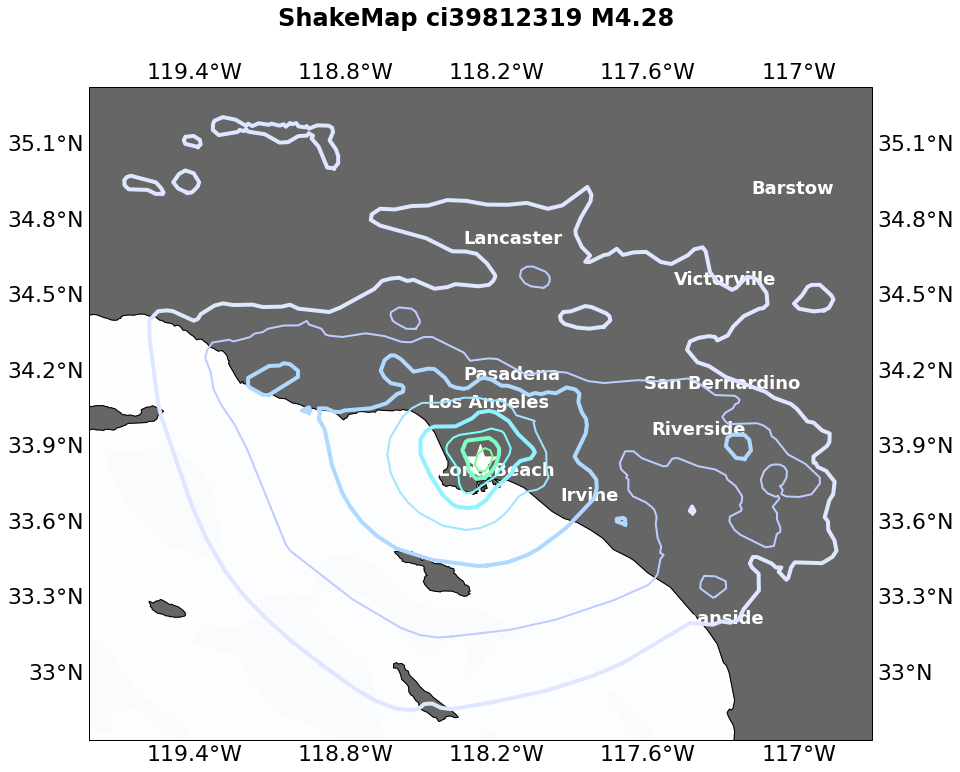

CPU times: user 55.2 s, sys: 613 ms, total: 55.8 s
Wall time: 56.8 s


In [25]:
%%time
## make intensity map


def main():
    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#     ax.set_extent((-118.5, -117, 33.5, 34.5))    # can pick boundaries if you want to zoom in

    ## plot features: ##
    cmap = plt.get_cmap('Blues')
    norm = colors.Normalize(0, 10000)
    for letter, level in [
                      ('L', 0),
                      ('K', 200),
                      ('J', 1000),
                      ('I', 2000),
                      ('H', 3000),
                      ('G', 4000),
                      ('F', 5000),
                      ('E', 6000),
                      ('D', 7000),
                      ('C', 8000),
                      ('B', 9000),
                      ('A', 10000)]:
        bathym = cft.NaturalEarthFeature(name='bathymetry_{}_{}'.format(letter, level),
                                 scale='10m', category='physical')
        ax.add_feature(bathym, facecolor=cmap(norm(level)), alpha=0.1, edgecolor='face')


#     ax.coastlines()
    ax.add_feature(land)
#     ax.add_feature(oceans)
    ax.add_feature(lakes)
    ax.add_feature(cft.STATES.with_scale('10m'), linestyle='-')
#     ax.add_feature(cft.BORDERS, linestyle='-')
#     ax.add_image(terrain, 10)

    ## epicenter location
    ax.scatter(evlo, evla, marker = '*', s = 1300, color = 'white', zorder = 8)
    
#     ax.tissot(rad_km=rad_est_mmi3, lons=lon_est, lats=lat_est,
#         facecolor = 'tan', edgecolor='#FFEC19', n_samples=40, zorder=7,
#         alpha = .2, label = 'largest alert - M%g' % m_est)
        
    ## set contour line thicknesses
    thick = 4
    thin = 2
    if plotmmi15:
        for i in range(len(lon15)):
            ax.plot(lon15[i], lat15[i], color = mmi15_color, zorder = 8, linewidth = thick, label = 'MMI II')
    if plotmmi2:
        for i in range(len(lon2)):
            ax.plot(lon2[i], lat2[i], color = mmi2_color, zorder = 8, linewidth = thin)
    if plotmmi25:
        for i in range(len(lon25)):
            ax.plot(lon25[i], lat25[i], color = mmi25_color, zorder = 8, linewidth = thick, label = 'MMI III')
    if plotmmi3:
        for i in range(len(lon3)):
            ax.plot(lon3[i], lat3[i], color = mmi3_color, zorder = 8, linewidth = thin)
    if plotmmi35:
        for i in range(len(lon35)):
            ax.plot(lon35[i], lat35[i], color = mmi35_color, zorder = 8, linewidth = thick, label = 'MMI IV')
    if plotmmi4:
        for i in range(len(lon4)):
            ax.plot(lon4[i], lat4[i], color = mmi4_color, zorder = 8, linewidth = thin)
    if plotmmi45:
        for i in range(len(lon45)):
            ax.plot(lon45[i], lat45[i], color = mmi45_color, zorder = 8, linewidth = thick, label = 'MMI V')
    if plotmmi5:
        for i in range(len(lon5)):
            ax.plot(lon5[i], lat5[i], color = mmi5_color, zorder = 8, linewidth = thin)
    if plotmmi55:
        for i in range(len(lon55)):
            ax.plot(lon55[i], lat55[i], color = mmi55_color, zorder = 8, linewidth = thick, label = 'MMI VI')
    if plotmmi6:
        for i in range(len(lon6)):
            ax.plot(lon6[i], lat6[i], color = mmi6_color, zorder = 8, linewidth = thin)
    if plotmmi65:
        for i in range(len(lon65)):
            ax.plot(lon65[i], lat65[i], color = mmi65_color, zorder = 8, linewidth = thick, label = 'MMI VII')
    if plotmmi7:
        for i in range(len(lon7)):
            ax.plot(lon7[i], lat7[i], color = mmi7_color, zorder = 8, linewidth = thin)
    if plotmmi75:
        for i in range(len(lon75)):
            ax.plot(lon75[i], lat75[i], color = mmi75_color, zorder = 8, linewidth = thick, label = 'MMI VIII')
    if plotmmi8:
        for i in range(len(lon8)):
            ax.plot(lon8[i], lat8[i], color = mmi8_color, zorder = 8, linewidth = thin)


## style the axes ##
    fontsize = 22
    gl = ax.gridlines(draw_labels=True, color='grey')
    gl.xlines = False
    gl.ylines = False     ## if you do not want lines across the map in either direction, you can change the gridline color to 'none'

## do you want labels all the way around the map?
    gl.xlabels_top = True
    gl.ylabels_left = True

## use locator to if you want to control the spacing of the ticks
#     gl.xlocator = mticker.FixedLocator(np.arange(-122.2, -121.3, .2))

## this is a pre-built function that will do some of the formatting for you
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

## style options: size, color, weight...
    gl.ylabel_style = {'size': fontsize, 'color': 'k'}
    gl.xlabel_style = {'size': fontsize, 'color': 'k'}

#     ax.text(txlon2, txlat2, 'MMI 2', rotation = tilt2, color = mmi2_color, size = fontsize, weight = 'bold')
#     ax.text(txlon25, txlat25, 'MMI 2.5', rotation = tilt25, color = mmi25_color, size = fontsize, weight = 'bold')
#     ax.text(txlon3, txlat3, 'MMI 3', rotation = tilt3, color = mmi3_color, size = fontsize, weight = 'bold')
#     ax.text(txlon35, txlat35, 'MMI 3.5', rotation = tilt35, color = mmi35_color, size = fontsize, weight = 'bold')
    
#     ax.set_xlim(-118.95, -117.7) # Carson
#     ax.set_ylim(33.55, 34.3) # Carson

## set the extent of town names to plot to match the largest extent of any of the contours
    plot_towns(ax, lats = lat15, lons = lon15)

    plt.title('ShakeMap %s M%s \n \n' % (evid, mag), fontsize = fontsize+2, weight = 'bold')
    
## Set a file name
#     plt.savefig(%s_ShakeMap_v1.jpeg' % evid, dpi = 300)

    plt.show()
    
if __name__ == '__main__':
    main()